<a href="https://colab.research.google.com/github/joelma78/GitPY/blob/main/Projeto_Final_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np

# Carregando o dataset Titanic
url_train = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'


# Carregar o dataset
df = pd.read_csv(url)

# Exibir as primeiras linhas do DataFrame
print("Primeiras 5 linhas do dataset:")
display(df.head())

# Exibir informações sobre o DataFrame (tipos de dados, valores não nulos, etc.)
print("\nInformações do dataset:")
display(df.info())

Primeiras 5 linhas do dataset:


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


None

In [36]:
# Limpar dados incorretos

# Verificar idades negativas (não aplicável neste dataset, mas boa prática)
# Se houvesse idades negativas, poderíamos removê-las ou tratá-las de outra forma.
# Exemplo: df = df[df['Age'] >= 0]

# Verificar preços (Fare) negativos ou zero (zero pode ser válido dependendo do contexto, mas negativo não)
# Neste dataset, os valores de 'Fare' são todos positivos.
# Se houvesse valores negativos, poderíamos removê-los ou tratá-los.
# Exemplo: df = df[df['Fare'] > 0]

print("Verificação inicial de dados incorretos concluída. Não foram identificados valores inválidos comuns (idades negativas, tarifas negativas) neste dataset.")

# Podemos inspecionar visualmente outras colunas se necessário
# print("\nVerificar valores únicos na coluna 'Pclass':")
# display(df['Pclass'].unique())
# print("\nVerificar valores únicos na coluna 'Sex':")
# display(df['Sex'].unique())

Verificação inicial de dados incorretos concluída. Não foram identificados valores inválidos comuns (idades negativas, tarifas negativas) neste dataset.


In [38]:
# Imputação de valores faltantes

# Verificar colunas com valores faltantes
print("Colunas com valores faltantes antes da imputação:")
display(df.isnull().sum())

# No dataset Titanic, a coluna 'Age' pode ter valores faltantes.
# Vamos imputar a média para a coluna 'Age' (é uma variável numérica contínua)
# E a moda para outras colunas categóricas se houver poucos valores faltantes.

# Verificar se há valores faltantes na coluna 'Age' antes de imputar
if df['Age'].isnull().sum() > 0:
    print("\nImputando a média na coluna 'Age'...")
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    print("Imputação na coluna 'Age' concluída.")
else:
    print("\nNão há valores faltantes na coluna 'Age'. Nenhuma imputação foi realizada nesta coluna.")


# Verificar novamente colunas com valores faltantes
print("\nColunas com valores faltantes após a imputação (se aplicável):")
display(df.isnull().sum())

# Se houvesse valores faltantes em outras colunas (ex: 'Embarked'), faríamos a imputação aqui.
# Exemplo (se houvesse valores faltantes em 'Embarked'):
# if df['Embarked'].isnull().sum() > 0:
#     print("\nImputando a moda na coluna 'Embarked'...")
#     df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
#     print("Imputação na coluna 'Embarked' concluída.")
# else:
#     print("\nNão há valores faltantes na coluna 'Embarked'.")

print("\nProcesso de imputação de valores faltantes concluído.")

Colunas com valores faltantes antes da imputação:


,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0



Não há valores faltantes na coluna 'Age'. Nenhuma imputação foi realizada nesta coluna.

Colunas com valores faltantes após a imputação (se aplicável):


,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0



Processo de imputação de valores faltantes concluído.


In [39]:
from sklearn.model_selection import train_test_split

# Separar as features (X) da variável alvo (y) do df_cleaned
# df_cleaned não inclui a coluna 'Name'
X = df_cleaned.drop('Survived', axis=1)
y = df_cleaned['Survived']

# Separar os dados em conjuntos de treino e teste
# Usaremos 80% para treino e 20% para teste (proporção comum)
# random_state garante que a divisão seja a mesma toda vez que rodarmos o código
# stratify=y é importante para manter a proporção das classes na divisão
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dados separados em treino e teste.")
print("Shape de X_train antes do pré-processamento:", X_train.shape)
print("Shape de X_test antes do pré-processamento:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

# Aplicar a pipeline de pré-processamento (que inclui encoding e scaling)
# FIT apenas nos dados de treino (X_train)
X_train_processed = preprocessing_pipeline.fit_transform(X_train)

# TRANSFORM nos dados de teste (X_test) - usar o FIT aprendido nos dados de treino
X_test_processed = preprocessing_pipeline.transform(X_test)

print("\nPipeline de pré-processamento aplicada.")
print("Shape de X_train após pré-processamento:", X_train_processed.shape)
print("Shape de X_test após pré-processamento:", X_test_processed.shape)

Dados separados em treino e teste.
Shape de X_train antes do pré-processamento: (709, 6)
Shape de X_test antes do pré-processamento: (178, 6)
Shape de y_train: (709,)
Shape de y_test: (178,)

Pipeline de pré-processamento aplicada.
Shape de X_train após pré-processamento: (709, 9)
Shape de X_test após pré-processamento: (178, 9)


In [40]:
from imblearn.combine import SMOTETomek
from collections import Counter

# Antes de aplicar SMOTE+Tomek, vamos ver a distribuição das classes no conjunto de treino processado
print("Distribuição das classes em y_train antes do balanceamento (após pré-processamento):")
display(Counter(y_train)) # A distribuição em y_train não muda com o pré-processamento de X

# Aplicar SMOTE + Tomek Links para balancear o conjunto de treino processado
smote_tomek = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train_processed, y_train)

print("\nDistribuição das classes em y_train após SMOTE+Tomek:")
display(Counter(y_train_balanced))

print("\nShape de X_train após balanceamento:", X_train_balanced.shape)
print("Shape de y_train após balanceamento:", y_train_balanced.shape)

Distribuição das classes em y_train antes do balanceamento (após pré-processamento):


Counter({1: 273, 0: 436})


Distribuição das classes em y_train após SMOTE+Tomek:


Counter({1: 392, 0: 392})


Shape de X_train após balanceamento: (784, 9)
Shape de y_train após balanceamento: (784,)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar e treinar o modelo de Regressão Logística
# Usaremos os dados balanceados e processados para o treinamento
model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' é bom para datasets menores
model.fit(X_train_balanced, y_train_balanced)

# Fazer predições no conjunto de teste (não balanceado, mas processado)
y_pred = model.predict(X_test_processed)

# Avaliar o desempenho do modelo
print("Acurácia do modelo de Regressão Logística:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação da Regressão Logística:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão da Regressão Logística:")
display(confusion_matrix(y_test, y_pred))

Acurácia do modelo de Regressão Logística: 0.7808988764044944

Relatório de Classificação da Regressão Logística:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178


Matriz de Confusão da Regressão Logística:


array([[85, 24],
       [15, 54]])

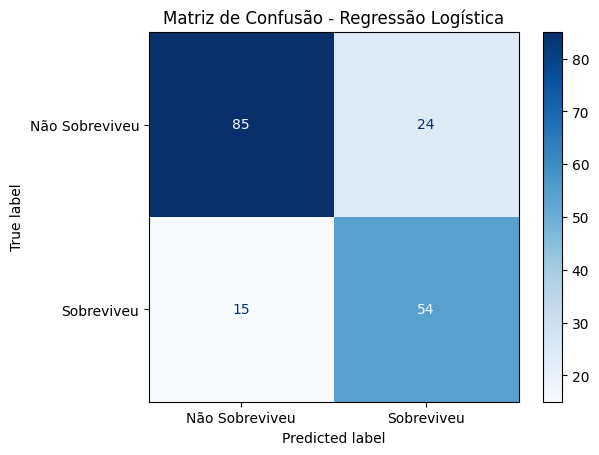

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obter a matriz de confusão
cm = confusion_matrix(y_test, y_pred) # Usamos y_test e y_pred do modelo de Regressão Logística

# Criar a visualização da matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Sobreviveu', 'Sobreviveu'])

# Plotar a matriz de confusão
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar e treinar o modelo de Random Forest
# Usaremos os dados balanceados e processados para o treinamento
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Fazer predições no conjunto de teste (não balanceado, mas processado)
y_pred_rf = rf_model.predict(X_test_processed)

# Avaliar o desempenho do modelo Random Forest
print("Acurácia do modelo Random Forest:", accuracy_score(y_test, y_pred_rf))
print("\nRelatório de Classificação do Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("\nMatriz de Confusão do Random Forest:")
display(confusion_matrix(y_test, y_pred_rf))

Acurácia do modelo Random Forest: 0.7640449438202247

Relatório de Classificação do Random Forest:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       109
           1       0.70      0.68      0.69        69

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178


Matriz de Confusão do Random Forest:


array([[89, 20],
       [22, 47]])

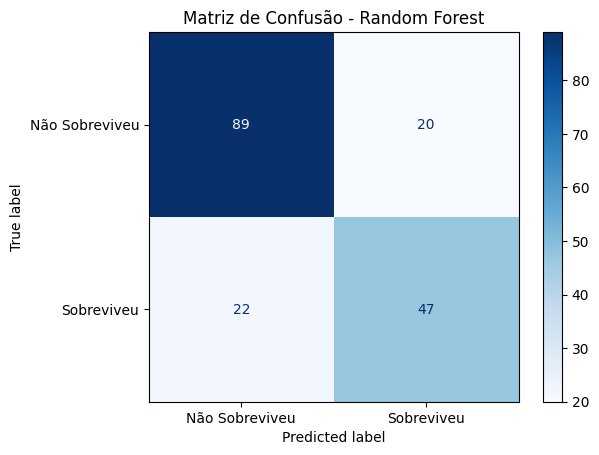

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obter a matriz de confusão para o modelo Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf) # Usamos y_test e y_pred_rf do modelo Random Forest

# Criar a visualização da matriz de confusão
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Não Sobreviveu', 'Sobreviveu'])

# Plotar a matriz de confusão
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Random Forest')
plt.show()

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar e treinar o modelo KNN
# Usaremos os dados balanceados e processados para o treinamento
knn_model = KNeighborsClassifier(n_neighbors=5) # n_neighbors é um parâmetro importante para KNN
knn_model.fit(X_train_balanced, y_train_balanced)

# Fazer predições no conjunto de teste (não balanceado, mas processado)
y_pred_knn = knn_model.predict(X_test_processed)

# Avaliar o desempenho do modelo KNN
print("Acurácia do modelo KNN:", accuracy_score(y_test, y_pred_knn))
print("\nRelatório de Classificação do KNN:")
print(classification_report(y_test, y_pred_knn))
print("\nMatriz de Confusão do KNN:")
display(confusion_matrix(y_test, y_pred_knn))

Acurácia do modelo KNN: 0.7808988764044944

Relatório de Classificação do KNN:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       109
           1       0.70      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178


Matriz de Confusão do KNN:


array([[86, 23],
       [16, 53]])

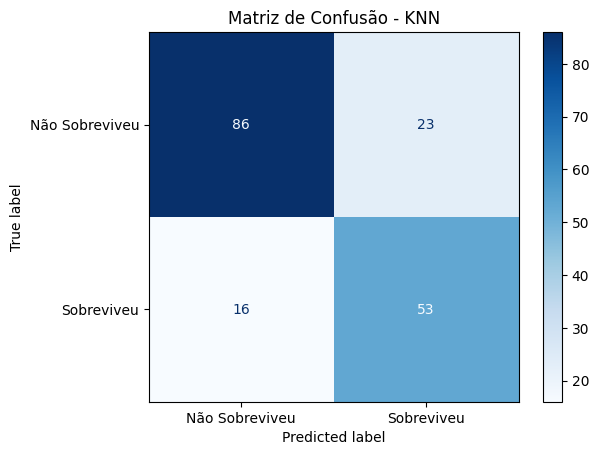

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obter a matriz de confusão para o modelo KNN
cm_knn = confusion_matrix(y_test, y_pred_knn) # Usamos y_test e y_pred_knn do modelo KNN

# Criar a visualização da matriz de confusão
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Não Sobreviveu', 'Sobreviveu'])

# Plotar a matriz de confusão
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - KNN')
plt.show()

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar e treinar o modelo Naive Bayes
# Usaremos os dados balanceados e processados para o treinamento
nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)

# Fazer predições no conjunto de teste (não balanceado, mas processado)
y_pred_nb = nb_model.predict(X_test_processed)

# Avaliar o desempenho do modelo Naive Bayes
print("Acurácia do modelo Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print("\nRelatório de Classificação do Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("\nMatriz de Confusão do Naive Bayes:")
display(confusion_matrix(y_test, y_pred_nb))

Acurácia do modelo Naive Bayes: 0.7528089887640449

Relatório de Classificação do Naive Bayes:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       109
           1       0.68      0.70      0.69        69

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178


Matriz de Confusão do Naive Bayes:


array([[86, 23],
       [21, 48]])

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar e treinar o modelo SVM
# Usaremos os dados balanceados e processados para o treinamento
svm_model = SVC(random_state=42) # Kernel padrão é 'rbf'
svm_model.fit(X_train_balanced, y_train_balanced)

# Fazer predições no conjunto de teste (não balanceado, mas processado)
y_pred_svm = svm_model.predict(X_test_processed)

# Avaliar o desempenho do modelo SVM
print("Acurácia do modelo SVM:", accuracy_score(y_test, y_pred_svm))
print("\nRelatório de Classificação do SVM:")
print(classification_report(y_test, y_pred_svm))
print("\nMatriz de Confusão do SVM:")
display(confusion_matrix(y_test, y_pred_svm))

Acurácia do modelo SVM: 0.8146067415730337

Relatório de Classificação do SVM:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       109
           1       0.72      0.86      0.78        69

    accuracy                           0.81       178
   macro avg       0.81      0.82      0.81       178
weighted avg       0.83      0.81      0.82       178


Matriz de Confusão do SVM:


array([[86, 23],
       [10, 59]])

In [50]:
import joblib

# Definir os nomes dos arquivos para salvar
model_filename = 'svm_titanic_model.pkl'
preprocessing_pipeline_filename = 'preprocessing_pipeline.pkl'

# Salvar o modelo SVM treinado
joblib.dump(svm_model, model_filename)

# Salvar a pipeline de pré-processamento
# A pipeline inclui o OneHotEncoder e o StandardScaler
joblib.dump(preprocessing_pipeline, preprocessing_pipeline_filename)


print(f"Modelo salvo como '{model_filename}'")
print(f"Pipeline de pré-processamento salva como '{preprocessing_pipeline_filename}'")

Modelo salvo como 'svm_titanic_model.pkl'
Pipeline de pré-processamento salva como 'preprocessing_pipeline.pkl'


In [51]:
import joblib
import pandas as pd
import numpy as np

# Carregar o modelo e a pipeline salvos
loaded_model = joblib.load('svm_titanic_model.pkl')
loaded_preprocessing_pipeline = joblib.load('preprocessing_pipeline.pkl')

print("Modelo e pipeline de pré-processamento carregados com sucesso.")

# --- Exemplo de Novos Dados ---
# Vamos criar um DataFrame com dados de um ou mais passageiros novos
# As colunas devem ser as mesmas usadas para treinar o modelo (exceto 'Survived' e 'Name')
new_data = pd.DataFrame({
    'Pclass': [3, 1],
    'Sex': ['male', 'female'],
    'Age': [30, 25],
    'Siblings/Spouses Aboard': [1, 0],
    'Parents/Children Aboard': [0, 1],
    'Fare': [15.0, 75.0]
})

print("\nNovos dados para predição:")
display(new_data)

# Aplicar a pipeline de pré-processamento aos novos dados
# Usamos apenas .transform() aqui, pois a pipeline já foi .fit() nos dados de treino
new_data_processed = loaded_preprocessing_pipeline.transform(new_data)

print("\nNovos dados após o pré-processamento:")
# O output é um array numpy, difícil de visualizar diretamente em formato de tabela
print(new_data_processed)


# Fazer predições usando o modelo carregado
predictions = loaded_model.predict(new_data_processed)

print("\nPredições de sobrevivência para os novos dados (0 = Não Sobreviveu, 1 = Sobreviveu):")
print(predictions)

# Opcional: Adicionar as predições de volta ao DataFrame original para melhor visualização
new_data['Predicted Survived'] = predictions
print("\nNovos dados com predições:")
display(new_data)

Modelo e pipeline de pré-processamento carregados com sucesso.

Novos dados para predição:


,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,male,30,1,0,15.0
1,1,female,25,0,1,75.0



Novos dados após o pré-processamento:
[[ 0.          1.          0.          0.          1.          0.02337889
   0.39355646 -0.50270654 -0.363758  ]
 [ 1.          0.          1.          0.          0.         -0.32620001
  -0.46765196  0.7611904   0.91457519]]

Predições de sobrevivência para os novos dados (0 = Não Sobreviveu, 1 = Sobreviveu):
[0 1]

Novos dados com predições:


,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Predicted Survived
0,3,male,30,1,0,15.0,0
1,1,female,25,0,1,75.0,1
